In [1]:
from pprint import pprint
import networkx as nx
import json
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np

# Read Data

In [2]:
try:
    with open('query/IMDb_data/IMDb2006-2015.json') as data_file:
        data = json.load(data_file)
except:
    print("No such file or directory: 'IMDb_data\\IMDb2006-2015.json'")
    exit()


def getData():
    return data

movies = getData()

movie = movies['tt0117743']

In [3]:
movies_list = list(movies.values())
movies = movies.copy()

In [4]:
list(movies_list[0].keys())

['Plot',
 'Rated',
 'Response',
 'Language',
 'Title',
 'Country',
 'Writer',
 'Metascore',
 'imdbRating',
 'Director',
 'Released',
 'Actors',
 'Year',
 'Genre',
 'Awards',
 'Runtime',
 'Type',
 'Poster',
 'imdbVotes',
 'imdbID']

In [5]:
movies_list[51256]

{'Plot': 'Upon losing his wife and son, Ahmet has to struggle with the feeling of loneliness.',
 'Rated': 'N/A',
 'Response': 'True',
 'Language': 'Turkish',
 'Title': 'Bulanti',
 'Country': 'Turkey',
 'Writer': 'Zeki Demirkubuz',
 'Metascore': 'N/A',
 'imdbRating': '6.4',
 'Director': 'Zeki Demirkubuz',
 'Released': '02 Oct 2015',
 'Actors': 'Zeki Demirkubuz, Sebnem Hassanisoughi, Öykü Karayel, Çaglar Çorumlu',
 'Year': '2015',
 'Genre': 'Drama',
 'Awards': '2 wins.',
 'Runtime': 'N/A',
 'Type': 'movie',
 'Poster': 'http://ia.media-imdb.com/images/M/MV5BZDg0NjQwNzctNWE4OC00NjAxLTkwNzMtNzdjNDFlZTRhM2Q3XkEyXkFqcGdeQXVyMTYzMDkwNjg@._V1_SX300.jpg',
 'imdbVotes': '554',
 'imdbID': 'tt5037996'}

# Data Processing & Cleaning

In [6]:
for movie in movies_list:
    if movie['Year'].isdecimal() == False or int(movie['Year']) < 2006 or int(movie['Year']) > 2015:
        movies_list.remove(movie)
    else:
        movie['Released'] = datetime.strptime(movie['Released'], '%d %b %Y') if movie['Released'] != 'N/A' and type(movie['Released'])!='str' else None
        movie['imdbRating'] = float(movie['imdbRating']) if movie['imdbRating'] != 'N/A' else None
    

In [7]:
df = pd.DataFrame(movies_list)

# Data Visualization

2015    9396
2014    9160
2013    8645
2012    8154
2011    7773
2010    7068
2009    6830
2008    5831
2007    5134
2006    4894
2016       1
Name: Year, dtype: int64


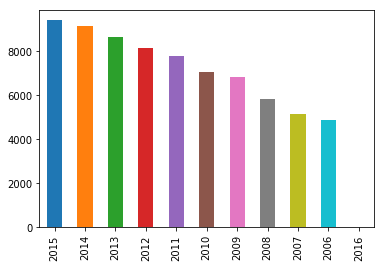

In [8]:
year_count = df['Year'].value_counts()
print(year_count)
year_count.plot('bar')

Drama                     17253
Comedy                     7703
N/A                        4061
Horror                     3020
Comedy, Drama              2862
Thriller                   2047
Drama, Romance             1694
Action                     1491
Comedy, Drama, Romance     1382
Comedy, Romance            1316
Romance                    1053
Drama, Thriller            1022
Horror, Thriller            988
Family                      689
Comedy, Horror              577
Crime, Drama, Thriller      572
Music                       568
Action, Crime, Drama        564
Drama, Family               563
Animation                   539
Name: Genre, dtype: int64


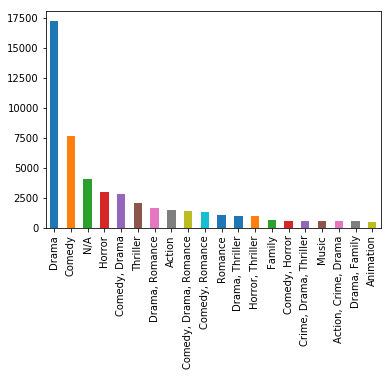

In [9]:
genre_count = df['Genre'].value_counts().nlargest(20)
print(genre_count)
genre_count.plot('bar')

# Top 30 Voted:

In [10]:
from query import top30movies_rating_voting

1	What the Flowers Have Brought Us	 rating:10.0
1	Someone to Carry Me	 rating:10.0
1	Orange Grove	 rating:10.0
1	For the Cause	 rating:10.0
1	Porkchop and a Glass of Water	 rating:10.0
1	Gumboot Kids	 rating:10.0
1	Dancing Alone	 rating:10.0
1	Hindsight 2020	 rating:10.0
1	Achena Prem	 rating:10.0
1	Bhalobasar Anek Naam	 rating:10.0
1	Bangland	 rating:10.0
2	Jan Quadrant Vincent 16	 rating:9.8
2	The Stones of Okella	 rating:9.8
2	Yeardley	 rating:9.8
2	Millie and the Lords	 rating:9.8
3	A Father's Journey	 rating:9.7
3	Beatbox	 rating:9.7
3	Homecoming	 rating:9.7
3	Canadian Dream	 rating:9.7
3	Unspeakable Indiscretions	 rating:9.7
3	Hing Ting Chot	 rating:9.7
3	Brush	 rating:9.7
4	Qlub Imwegggha	 rating:9.6
4	Inbrottet	 rating:9.6
4	Summertime	 rating:9.6
4	Miles Away	 rating:9.6
4	The Industry	 rating:9.6
4	Yume no mani mani	 rating:9.6
4	Patna Se Pakistan	 rating:9.6
4	Jazzed Up Hoodlums	 rating:9.6
4	Eating Saltines	 rating:9.6
4	Profile	 rating:9.6
4	From Grace	 rating:9.6
--------

# Rating-Voting Correlation

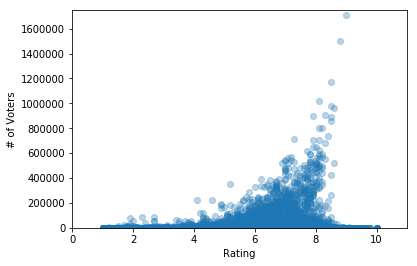

In [11]:
N = len(movies)
x,y=[],[]
xMax=0
yMax=0

for key, movie in movies.items():
    try:
        y1 = int(movie["imdbVotes"].replace(",",""))
        x1 = float(movie["imdbRating"])
        x.append(x1)
        y.append(y1)
        if x1>xMax:
            xMax = x1
        if y1>yMax:
            yMax = y1
    except:
        continue


plt.scatter(x,y, alpha=0.3)
plt.xlim(0,xMax+xMax*0.1)
plt.ylim(0,yMax+yMax*0.02)
plt.xlabel('Rating')
plt.ylabel('# of Voters')
plt.savefig('rating_voting_correlation.png')
plt.show()

For one thing, we can see that the relation of # of voters and rating.  #of voters are proportional to the ratings.  More voters always have a great rating.  It means more voters implies greater rating.  In reality reasoning, I think this is a chain effect, better rating implies more people to watch.  Then, if the audience think this is go, they will go giving a great rating. Then this will be a snow ball accumulate. But not all audience will give a great rating.  The minority will lower the rating but not affecting the rating significantly.

Second, I think the distribution or variant of the rating is unstable on small amount of voters.  We can see that on the graph.  The rating of movie whose # of voters lower than 200,000 is distributed over 1 to 10.  It is because every voter contributes greater proportion of the rating.  Small size of voters may imply the movie is some rarely category, sub culture movie or those actually have a bad rating in previous history.

In conclusion, I think if the # of voters more, then the rating will be more stable and more centralize to 5-8 (ratings).  Moreover, more # of voters also mean this movie is popular.  This always implies the movie is suitable for majority. 


# Top-10 Collaborative Actors

In [12]:
from query import top10actors

Brahmanandam, 415
Prakash Raj, 242
Eric Roberts, 234
Ali, 233
Mihir Das, 224
Michael Madsen, 195
Mohanlal, 177
Ravi Kishan, 173
Mammootty, 171
Danny Trejo, 162
